El archivo eph21 3T.csv tiene datos de la EPH, encuesta permanente de hogares, realizada en el tercer
trimestre de 2021. 2 El archivo tiene informaci´on sobre 78217 personas encuestadas, esta encuesta
incluye informaci´on de todos los habitantes de un hogar. Las tres columnas del archivo son:
ingresototal: ingreso total de las personas encuestadas
mujer: variable indicadora, vale 1 en el caso de que la persona encuestada sea mujer, 0 sino
ingresototal.conruido: es la variable ingreso total a la que se le sum´o un peque˜no ruido
aleatorio para evitar el redondeo producido al reportar ingresos, y que la variable sea efectivamente
continua. Esta es la variable que utilizaremos para el an´alisis.
De la base de datos que figura en la p´agina del INDEC se excluye a las/los encuestados que reportaron
ingresos nulos o que no reportaron su ingreso, esto da un total de 42348 personas. Queremos estudiar si
el ingreso mediano poblacional de varones y mujeres es diferente. Como no conocemos la distribuci´on
de la variable ingreso, buscaremos hacerlo mediante bootstrap.

a) Hallar una estimacion de la mediana de los ingresos totales (con ruido) de las mujeres y de la de los hombres en la base de datos. Calcular la diferencia entre ellas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("C:\\Users\\dario\\OneDrive\\Escritorio\\Unab\\Inferencia y Patrones\\Comisión 2 Florencia Statti\\Datos para Ejercicios\\eph21_3T.csv")
df.head()

,ingresototal,mujer,ingresototal.conruido
0,2500,0,2470.995822
1,7000,1,7237.152968
2,40000,0,40234.372410
3,40000,1,40126.784241
4,25000,0,25385.510123


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42348 entries, 0 to 42347
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ingresototal           42348 non-null  int64  
 1   mujer                  42348 non-null  int64  
 2   ingresototal.conruido  42348 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 992.7 KB


In [26]:
hombres = df[df["mujer"] == 0]
mujeres = df[df["mujer"] == 1]

In [77]:
print("Respuesta al punto A:")
media_mujer = np.median(mujeres["ingresototal.conruido"])
print(f"\nEl promedio de ingreso para la mujer es: {media_mujer:.2f}")
media_hombre= np.median(hombres["ingresototal.conruido"])
print(f"El promedio de ingreso para el hombre es: {media_hombre:.2f}")
print(f"\nLa diferencia entre ambos es de: {media_hombre-media_mujer:.2f} a favor del hombre.")

Respuesta al punto A:

El promedio de ingreso para la mujer es: 30115.29
El promedio de ingreso para el hombre es: 39148.74

La diferencia entre ambos es de: 9033.44 a favor del hombre.


b) Tomar una muestra bootstrap de los ingresos totales (con ruido) de las mujeres, y tomar la mediana de dicha muestra. Elegir una muestra bootstrap de los ingresos totales (con ruido) de los hombres y calcular la mediana. Luego guardar la diferencia entre ambas medianas bootstrap.

In [78]:
B = 1000
n1 = len(hombres)
n2= len(mujeres)

for i in range(B):
    muestra_hombre = hombres.sample(n=n1, replace= True)
    muestra_mujer = mujeres.sample(n=n2, replace = True)

median_boot_hombre = np.median(muestra_hombre["ingresototal.conruido"])
median_boot_mujer = np.median(muestra_mujer["ingresototal.conruido"])

print(f"Respuesta al punto B:")
print(f"\nLa mediana Bootstrapeada para el ingreso del hombre es: {median_boot_hombre:.2f}\nPor otro lado, la mediana Bootstrapeada para el ingreso de la mujer es: {median_boot_mujer:.2f}.")

Respuesta al punto B:

La mediana Bootstrapeada para el ingreso del hombre es: 39030.28
Por otro lado, la mediana Bootstrapeada para el ingreso de la mujer es: 30153.76.


c) Repetir el analisis del ıtem anterior una cantidad B = 5000 veces, guardando en un vector las diferencias de las medianas estimadas. A partir de ellas, graficar un histograma y hallar una estimacion del error estandar de la diferencia de medianas muestrales.

In [79]:
B = 5000
n1 = len(hombres)
n2= len(mujeres)

vector_muestras = np.array(np.zeros(B))

for i in range(B):
    muestra_hombre = hombres.sample(n=n1, replace= True)
    muestra_mujer = mujeres.sample(n=n2, replace = True)

    median_boot_hombre = np.median(muestra_hombre["ingresototal.conruido"])
    median_boot_mujer = np.median(muestra_mujer["ingresototal.conruido"])

    vector_muestras[i] = median_boot_hombre-median_boot_mujer

error_standar = np.std(vector_muestras, ddof= 1)
print(f"Error Estandar hallado: {error_standar:.2f}")

Error Estandar hallado: 598.79


<function matplotlib.pyplot.show(close=None, block=None)>

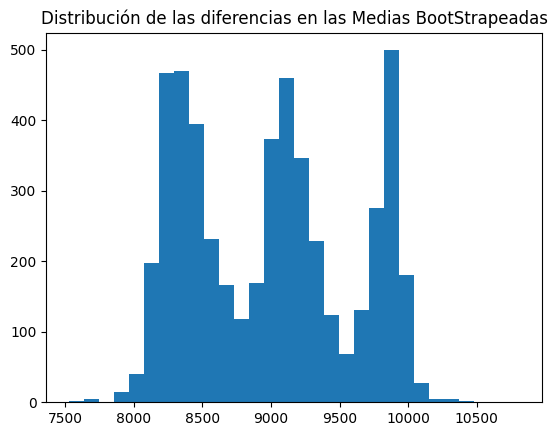

In [67]:
plt.hist(vector_muestras, bins= 30)
plt.title("Distribución de las diferencias en las Medias BootStrapeadas")
plt.show

D) Hallar estimaciones por intervalos de confianza de nivel 0,95 para la diferencia de medianas de los salarios de mujeres y hombres basados en las muestras bootstrap con los dos metodos vistos en clase. En base a estos datos, ¿parecen diferentes los ingresos medianos de mujeres y hombres en la poblacion?

In [80]:
intervalo = np.percentile(vector_muestras, [2.5,97.5])
print(f"El intervalo de confianza hallado es: {intervalo}")

El intervalo de confianza hallado es: [8125.61847272 9975.73928783]


<function matplotlib.pyplot.show(close=None, block=None)>

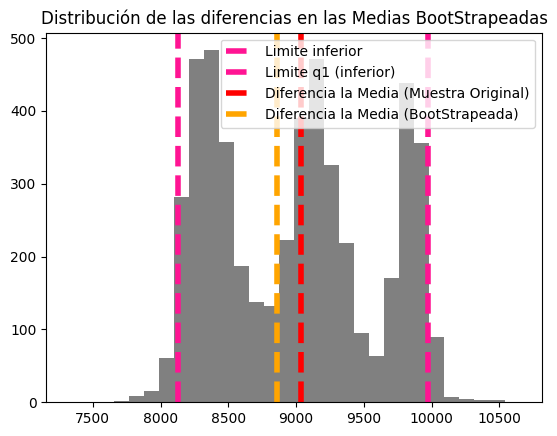

In [81]:
plt.axvline(intervalo[0], 
            linestyle = "--", 
            lw = 4, 
            color="deeppink",
            label= "Limite inferior")
plt.axvline(intervalo[1], 
            linestyle = "--", 
            lw = 4, 
            color="deeppink",
            label= "Limite q1 (inferior)")
plt.axvline(media_hombre-media_mujer,
            linestyle= "--",
            lw = 4,
            color = "red",
            label = "Diferencia la Media (Muestra Original)")
plt.axvline(median_boot_hombre-median_boot_mujer,
            linestyle= "--",
            lw = 4,
            color = "orange",
            label = "Diferencia la Media (BootStrapeada)")
plt.hist(vector_muestras, bins= 30, color='grey')
plt.title("Distribución de las diferencias en las Medias BootStrapeadas")
plt.legend()
plt.show
